# Hand Gesture Command Controls 

##  1.Data Collection 

In [16]:
import warnings
import os
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout, dr

ImportError: cannot import name 'dr' from 'keras.layers' (c:\users\srihari\appdata\local\programs\python\python38\lib\site-packages\keras\layers\__init__.py)

In [27]:
CATEGORIES = ['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

IMG_SIZE = 120

# paths for dataset
data_path ="C://Users//Srihari//data//train//"


In [28]:
# Loading the images and their class(0 - 9)
image_data = []

In [29]:
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        print(class_index)
        path = os.path.join(data_path,dr,category)
        print(path)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass

0
C://Users//Srihari//data//train//data\01_palm
1
C://Users//Srihari//data//train//data\02_fist
2
C://Users//Srihari//data//train//data\03_thumbs-up
3
C://Users//Srihari//data//train//data\04_thumbs-down
4
C://Users//Srihari//data//train//data\05_index-right
5
C://Users//Srihari//data//train//data\06_index-left
6
C://Users//Srihari//data//train//data\07_no-gesture


In [30]:
# shuffle the input data
import random
random.shuffle(image_data)

In [31]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [32]:
label[:7]

[3, 3, 4, 0, 2, 4, 4]

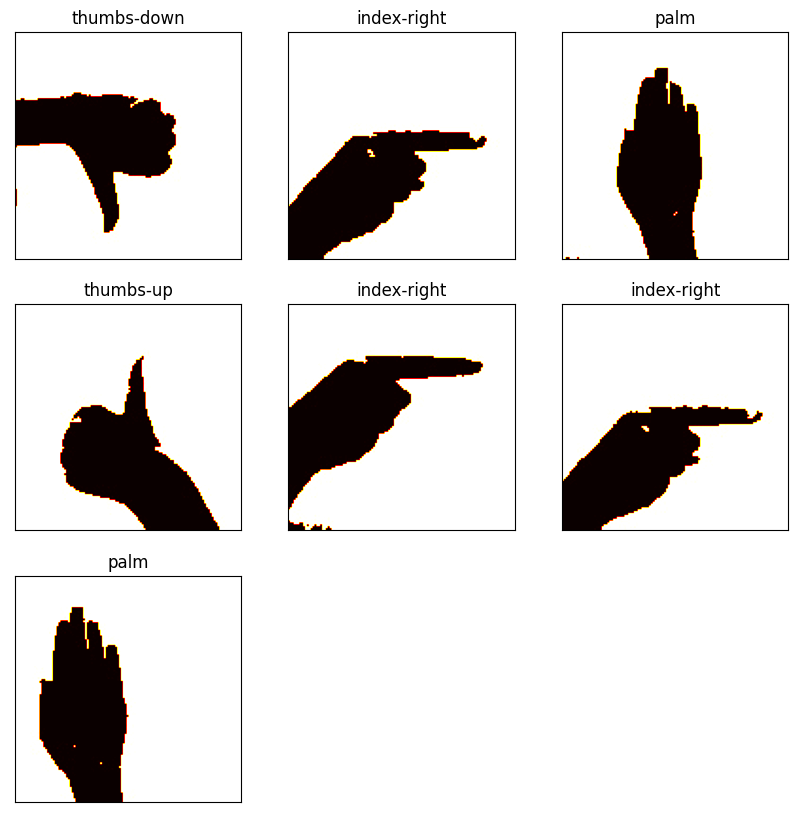

In [33]:
plt.figure(1, figsize=(10,10))
for i in range(1,8):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [34]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(570, 120, 120)

In [35]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=7,dtype='i1')
label[0]

array([0, 0, 0, 1, 0, 0, 0], dtype=int8)

## Building the CNN

In [36]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [37]:
import sklearn
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)


In [38]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [39]:
history=model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/7
13/13 [==============================] - 24s 2s/step - loss: 3.8377 - accuracy: 0.3534 - val_loss: 1.2866 - val_accuracy: 0.6082
Epoch 2/7
13/13 [==============================] - 21s 2s/step - loss: 0.4876 - accuracy: 0.8697 - val_loss: 0.3237 - val_accuracy: 0.8655
Epoch 3/7
13/13 [==============================] - 21s 2s/step - loss: 0.0531 - accuracy: 0.9850 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 4/7
13/13 [==============================] - 21s 2s/step - loss: 0.1338 - accuracy: 0.9599 - val_loss: 0.0856 - val_accuracy: 0.9942
Epoch 5/7
13/13 [==============================] - 21s 2s/step - loss: 0.0155 - accuracy: 0.9925 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 6/7
13/13 [==============================] - 21s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 7/7
13/13 [==============================] - 21s 2s/step - loss: 8.0607e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000


In [40]:
model.save('visual_model.hdf5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      320       
                                                                 
 activation (Activation)     (None, 118, 118, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 116, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 116, 116, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 58, 58, 32)        0         
                                                        

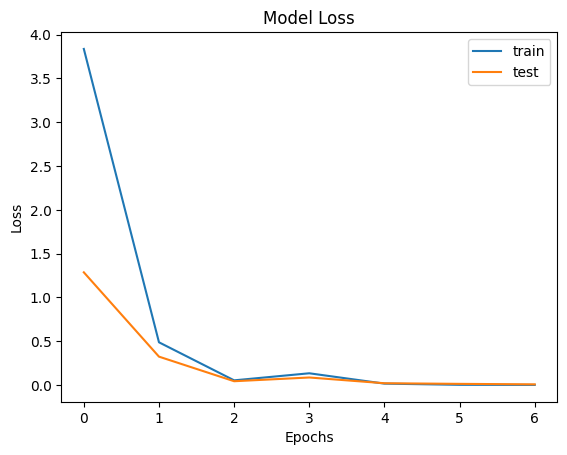

In [41]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
# save the figure
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

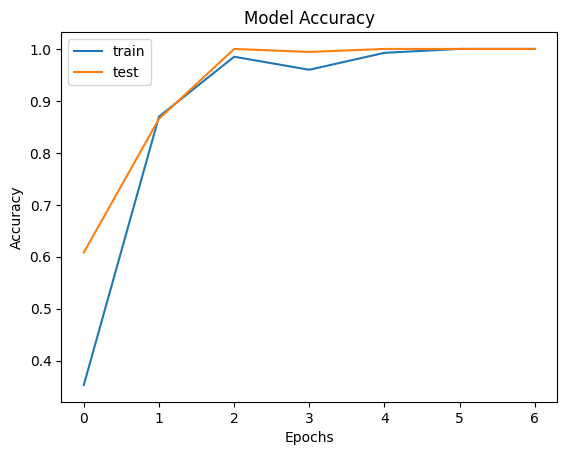

In [42]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
# save the figure
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

## Test accuracy

In [43]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

6/6 [==============================] - 2s 329ms/step - loss: 0.0073 - accuracy: 1.0000
Test accuracy: 100.00%


6/6 [==============================] - 2s 315ms/step


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

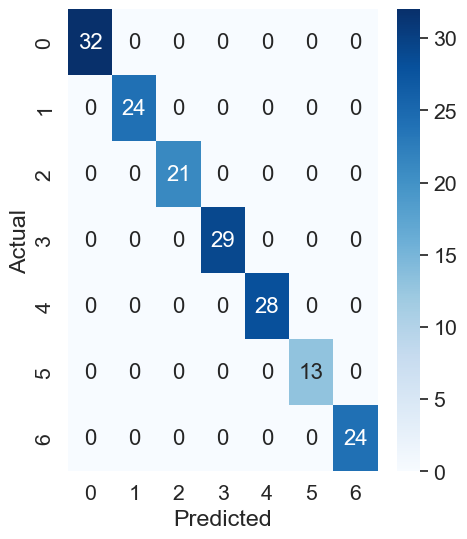

In [44]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(X_test), axis=1)

data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,6))
sn.set(font_scale=1.4)#for label size
plt.savefig('confusion_matrix.jpg')
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [45]:
from sklearn.metrics import classification_report
y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(X_test), axis=1)
#Plotting the confusion matrix
target_names=['01_palm',
     '02_fist',
     '03_thumbs-up',
     '04_thumbs-down',
     '05_index-right',
     '06_index-left',
     '07_no-gesture']
print(classification_report(y_true, y_pred, target_names=target_names))

6/6 [==============================] - 2s 315ms/step
                precision    recall  f1-score   support

       01_palm       1.00      1.00      1.00        32
       02_fist       1.00      1.00      1.00        24
  03_thumbs-up       1.00      1.00      1.00        21
04_thumbs-down       1.00      1.00      1.00        29
05_index-right       1.00      1.00      1.00        28
 06_index-left       1.00      1.00      1.00        13
 07_no-gesture       1.00      1.00      1.00        24

      accuracy                           1.00       171
     macro avg       1.00      1.00      1.00       171
  weighted avg       1.00      1.00      1.00       171



In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

def PerformanceReports(conf_matrix,class_report,labels):
    f, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_matrix, annot=True,ax=ax,cmap="Blues")
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
    ax.set_title('Classification Report')
    plt.show() 

6/6 [==============================] - 2s 311ms/step


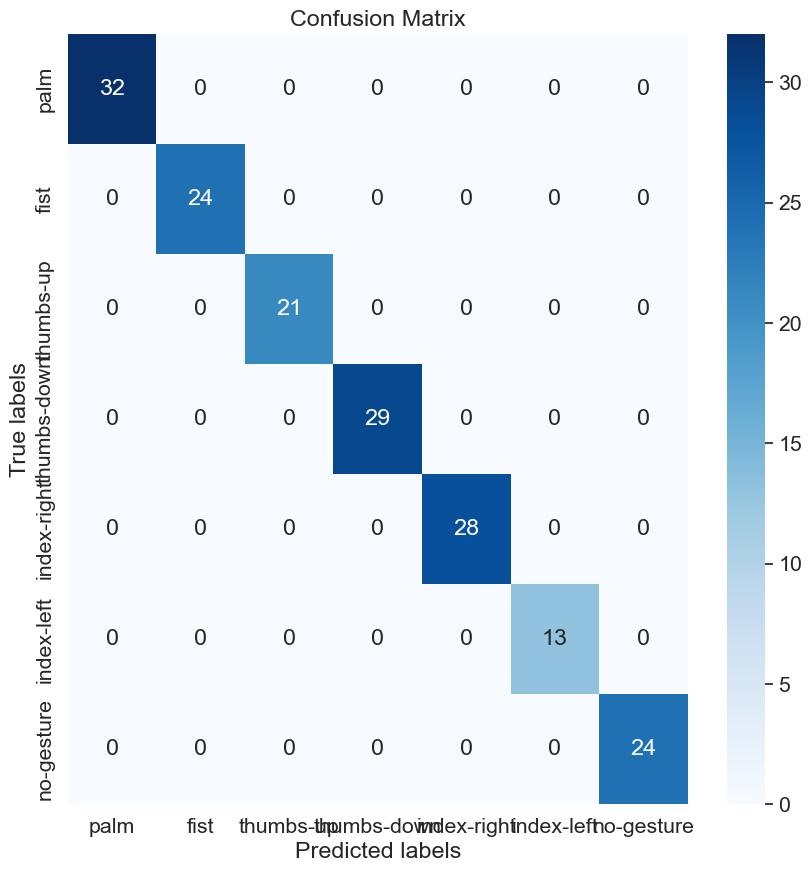

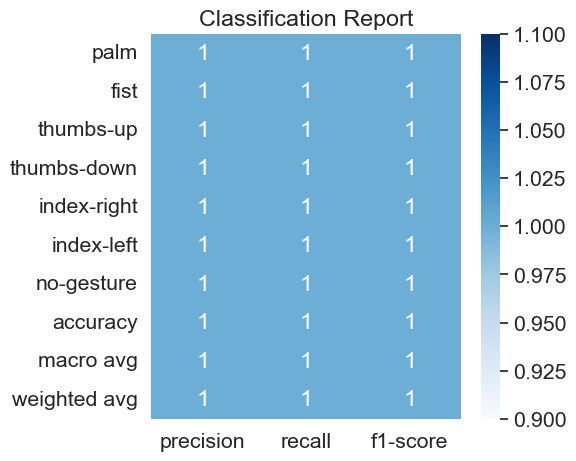

In [47]:
labels=['palm',
     'fist',
     'thumbs-up',
     'thumbs-down',
     'index-right',
     'index-left',
     'no-gesture']
    
test_labels = np.argmax(y_test, axis=1)
predictions = np.argmax(model.predict(X_test), axis=1)
cm=confusion_matrix(test_labels,predictions)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
PerformanceReports(cm,class_report,labels)

In [48]:
import itertools
def plot_confusion_matrix(cm,
                          target_names,
                          output_file,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):


    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig(output_file)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Users\\Srihari\\.png'

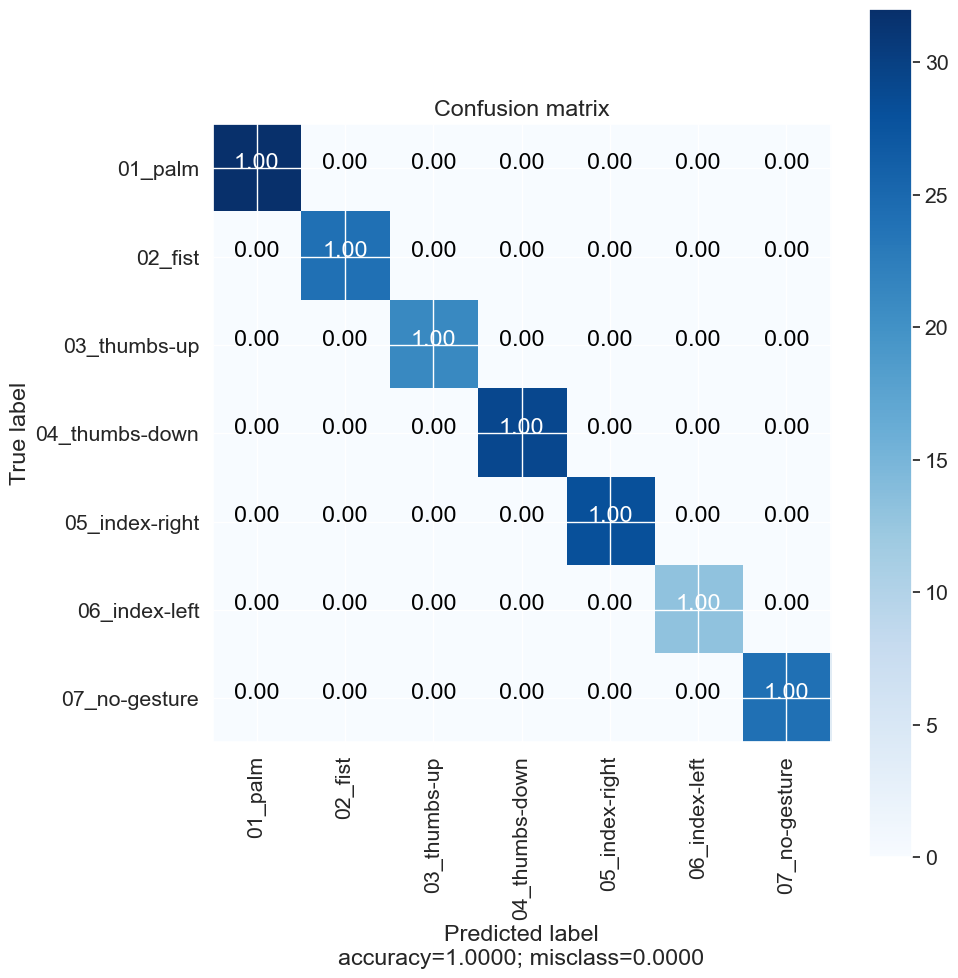

In [57]:
#Plotting the confusion matrix
class_names=['01_palm',
     '02_fist',
     '03_thumbs-up',
     '04_thumbs-down',
     '05_index-right',
     '06_index-left',
     '07_no-gesture']

output_file='Users\Srihari\\'
# Plotting non-normalized confusion matrix
plot_confusion_matrix(cm, class_names, output_file, title='Confusion matrix')


6/6 [==============================] - 2s 356ms/step


<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

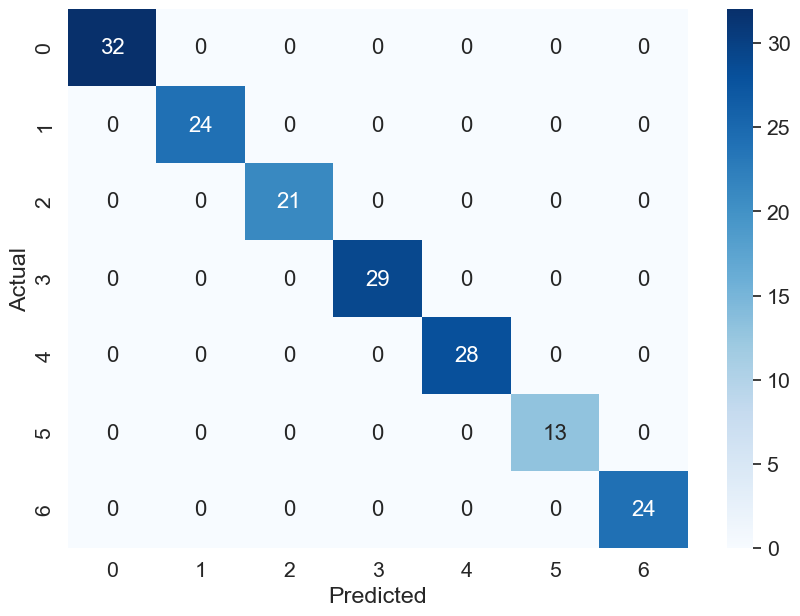

In [58]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(X_test), axis=1)

data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Plotting the confusion matrix
matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
precision =  precision_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1),average=None)
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1), normalize=True, sample_weight=None)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1), average=None)
print("Confusion Matrix:\n", matrix, "\n")
print("Accuracy:", accuracy, "\n")
print("Recall:", recall, "\n")
print("Precision:", precision)

6/6 [==============================] - 2s 327ms/step
Confusion Matrix:
 [[32  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0]
 [ 0  0 21  0  0  0  0]
 [ 0  0  0 29  0  0  0]
 [ 0  0  0  0 28  0  0]
 [ 0  0  0  0  0 13  0]
 [ 0  0  0  0  0  0 24]] 

Accuracy: 1.0 

Recall: [1. 1. 1. 1. 1. 1. 1.] 

Precision: [1. 1. 1. 1. 1. 1. 1.]


In [60]:
from sklearn.metrics import classification_report
y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(X_test), axis=1)
#Plotting the confusion matrix
target_names=['01_palm',
     '02_fist',
     '03_thumbs-up',
     '04_thumbs-down',
     '05_index-right',
     '06_index-left',
     '07_no-gesture']
print(classification_report(y_true, y_pred, target_names=target_names))

6/6 [==============================] - 2s 352ms/step
                precision    recall  f1-score   support

       01_palm       1.00      1.00      1.00        32
       02_fist       1.00      1.00      1.00        24
  03_thumbs-up       1.00      1.00      1.00        21
04_thumbs-down       1.00      1.00      1.00        29
05_index-right       1.00      1.00      1.00        28
 06_index-left       1.00      1.00      1.00        13
 07_no-gesture       1.00      1.00      1.00        24

      accuracy                           1.00       171
     macro avg       1.00      1.00      1.00       171
  weighted avg       1.00      1.00      1.00       171

